In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('phishing.csv')
df.head()
target ='label'

In [3]:
df_remove = df.drop(columns=['URLSimilarityIndex','CharContinuationRate','URLTitleMatchScore','URLCharProb','TLDLegitimateProb','FILENAME'])

In [4]:
df_remove.shape

(235795, 50)

In [5]:
df_remove

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,3,1,0,0,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,2,1,0,0,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,2,2,0,0,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,3,1,0,0,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,3,1,0,0,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,3,1,0,0,...,1,0,1,51,7,21,187,2,191,1
235791,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,2,2,0,0,...,1,0,0,50,1,7,88,0,31,1
235792,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,2,1,0,0,...,0,0,1,27,10,30,58,2,67,1
235793,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,3,2,0,0,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
df_corr=df_remove.drop(columns=['URL','Domain','TLD','Title'])

In [7]:
df_corr.corr()

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,0.033339,0.071058,0.161980,0.459094,0.127472,0.956047,0.312632,...,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,0.152669,0.399157,0.041643,0.011304,0.021627,0.277602,0.547854,...,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.011125,0.084619,0.001239,0.000354,0.000977,0.244300,-0.002630,...,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
TLDLength,0.033339,0.152669,-0.011125,1.000000,-0.162431,0.000974,0.001902,-0.004028,0.048343,0.164608,...,0.023103,0.017689,-0.043484,-0.029074,-0.004249,-0.024109,-0.046451,-0.014442,-0.026486,-0.079159
NoOfSubDomain,0.071058,0.399157,0.084619,-0.162431,1.000000,0.015902,-0.001477,0.002461,0.054145,-0.047034,...,-0.024983,-0.016590,-0.006321,-0.009474,-0.001003,-0.010226,0.003108,0.001702,-0.001538,-0.005955
HasObfuscation,0.161980,0.041643,0.001239,0.000974,0.015902,1.000000,0.291858,0.798791,0.133774,0.042716,...,-0.009674,-0.002711,-0.014249,-0.012997,-0.002841,-0.015700,-0.016541,-0.004463,-0.013342,-0.052473
NoOfObfuscatedChar,0.459094,0.011304,0.000354,0.001902,-0.001477,0.291858,1.000000,0.349467,0.242563,0.001870,...,0.001481,-0.001472,0.002169,-0.003830,-0.000577,-0.003356,-0.004828,-0.001601,-0.003515,-0.015315
ObfuscationRatio,0.127472,0.021627,0.000977,-0.004028,0.002461,0.798791,0.349467,1.000000,0.095349,0.028305,...,-0.008353,-0.004155,-0.015128,-0.010495,-0.002362,-0.013051,-0.013189,-0.003806,-0.010588,-0.041915
NoOfLettersInURL,0.956047,0.277602,0.244300,0.048343,0.054145,0.133774,0.242563,0.095349,1.000000,0.417004,...,-0.066845,-0.027067,-0.145421,-0.072063,-0.016236,-0.088499,-0.083257,-0.025965,-0.065286,-0.258090
LetterRatioInURL,0.312632,0.547854,-0.002630,0.164608,-0.047034,0.042716,0.001870,0.028305,0.417004,1.000000,...,-0.090070,-0.034967,-0.241468,-0.107732,-0.023210,-0.126983,-0.126916,-0.039405,-0.090799,-0.367794


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


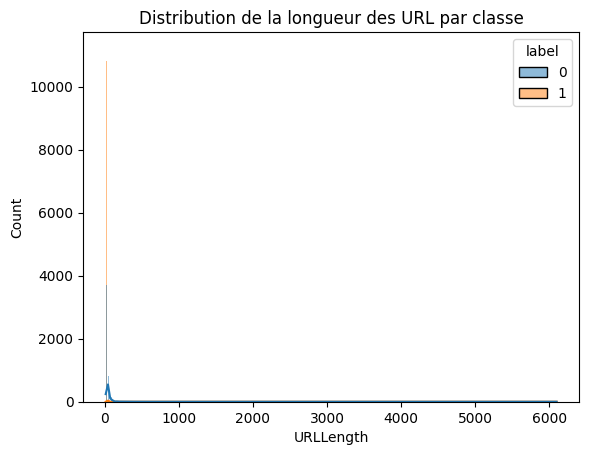

In [8]:
# Distribution de URLLength pour chaque classe
sns.histplot(data=df_corr, x='URLLength', hue='label', kde=True)
plt.title('Distribution de la longueur des URL par classe')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [10]:
sc= StandardScaler()
scaled_data= sc.fit_transform(df_corr)

In [11]:
pca= PCA()
pca.fit_transform(scaled_data)


array([[ 1.44100649e+00,  4.92276637e-01,  8.08688293e-01, ...,
        -2.16636714e-02, -4.13792586e-03,  7.41266867e-03],
       [ 1.35416759e+00,  1.94545281e-02, -7.28359975e-01, ...,
         1.20665654e-01, -6.85486318e-02,  9.44834338e-03],
       [ 1.25803040e+00,  3.96970847e-01,  6.69115599e-02, ...,
         8.56924734e-02, -1.28728074e-01,  1.30276165e-03],
       ...,
       [ 2.50535457e+00,  6.09331440e-01, -6.88974894e-01, ...,
         2.41662710e-02, -4.79736817e-02,  4.30204750e-03],
       [-1.96072572e+00,  6.99560142e-01,  2.89960456e+00, ...,
        -2.59309687e-02,  8.82468076e-02, -1.16065441e-02],
       [ 2.24242173e+00,  6.04516377e-01, -1.98746438e-01, ...,
         2.90885370e-02, -8.41542665e-02,  6.44715843e-03]])

In [12]:
df_corr

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,3,1,0,0,0.0,18,0.581,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,2,1,0,0,0.0,9,0.391,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,2,2,0,0,0.0,15,0.517,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,3,1,0,0,0.0,13,0.500,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,3,1,0,0,0.0,20,0.606,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,3,1,0,0,0.0,16,0.552,...,1,0,1,51,7,21,187,2,191,1
235791,28,21,0,2,2,0,0,0.0,14,0.500,...,1,0,0,50,1,7,88,0,31,1
235792,30,23,0,2,1,0,0,0.0,17,0.567,...,0,0,1,27,10,30,58,2,67,1
235793,55,47,0,3,2,0,0,0.0,39,0.709,...,0,0,0,0,0,3,0,0,0,0


In [13]:
df_corr

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,3,1,0,0,0.0,18,0.581,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,2,1,0,0,0.0,9,0.391,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,2,2,0,0,0.0,15,0.517,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,3,1,0,0,0.0,13,0.500,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,3,1,0,0,0.0,20,0.606,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,29,22,0,3,1,0,0,0.0,16,0.552,...,1,0,1,51,7,21,187,2,191,1
235791,28,21,0,2,2,0,0,0.0,14,0.500,...,1,0,0,50,1,7,88,0,31,1
235792,30,23,0,2,1,0,0,0.0,17,0.567,...,0,0,1,27,10,30,58,2,67,1
235793,55,47,0,3,2,0,0,0.0,39,0.709,...,0,0,0,0,0,3,0,0,0,0


In [14]:
X = df_corr.iloc[:,:45]
y = df_corr.iloc[:,45]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# j'applique un random forest pour ensuite Obtenir les importances des caractéristiques
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

NoOfExternalRef               0.196983
LineOfCode                    0.161050
NoOfSelfRef                   0.108715
NoOfImage                     0.092243
NoOfCSS                       0.070375
NoOfJS                        0.053884
HasCopyrightInfo              0.046241
HasSocialNet                  0.040735
HasDescription                0.036120
LargestLineLength             0.027319
IsHTTPS                       0.025819
NoOfOtherSpecialCharsInURL    0.025797
NoOfDegitsInURL               0.017226
URLLength                     0.016739
DomainTitleMatchScore         0.015124
DegitRatioInURL               0.009383
NoOfLettersInURL              0.009081
HasSubmitButton               0.008260
SpacialCharRatioInURL         0.007739
IsResponsive                  0.006389
LetterRatioInURL              0.005819
NoOfSubDomain                 0.004694
NoOfEmptyRef                  0.004096
HasHiddenFields               0.003362
HasTitle                      0.002005
DomainLength             

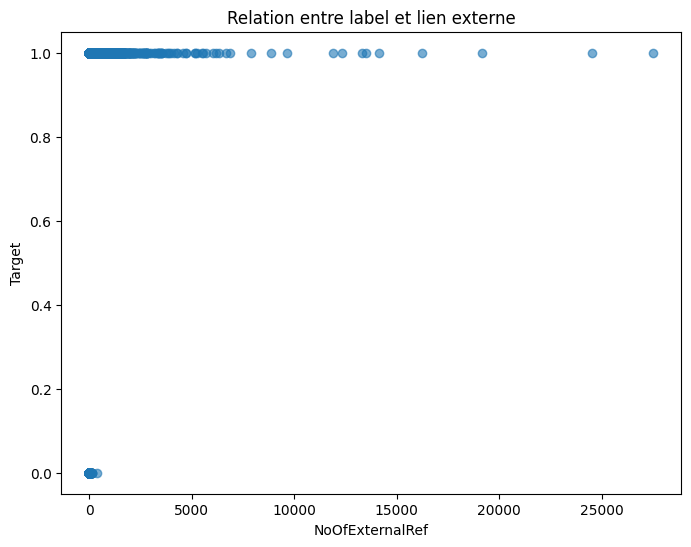

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X['NoOfExternalRef'], y, alpha=0.6)
plt.xlabel("NoOfExternalRef")
plt.ylabel("Target")
plt.title("Relation entre label et lien externe")
plt.show()

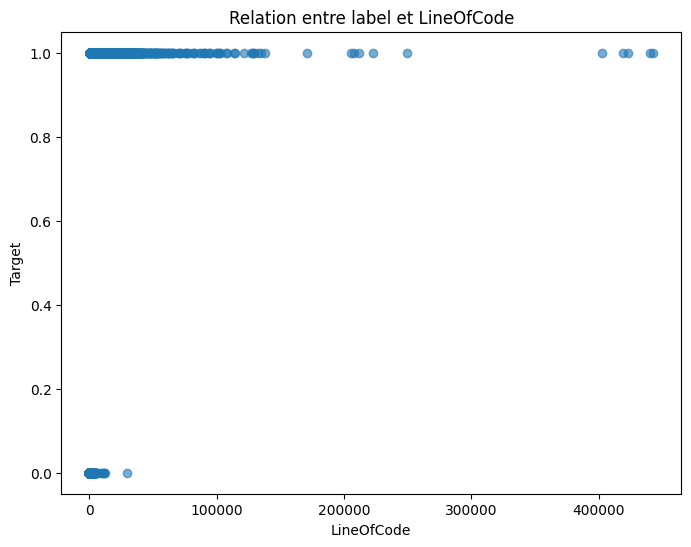

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X['LineOfCode'], y, alpha=0.6)
plt.xlabel("LineOfCode")
plt.ylabel("Target")
plt.title("Relation entre label et LineOfCode")
plt.show()

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prédire les valeurs de l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9998939756992302
Confusion Matrix:
 [[20120     4]
 [    1 27034]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



Application d'un model de reseau de neurone


In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
